# 158736 Advanced Machine Learning: Assignment 1

Luis Vieira :: 23012096

## Introduction

In this data science project, I applied supervised machine learning techniques to predict diabetes based on medical data, focusing on classification models. The workflow includes data exploration, data wrangling, feature selection, and model evaluation. The goal was to accurately predict diabetes using models like SVM, MLP, Logistic Regression, and versions with PCA and LDA dimensionality reduction techniques.


#### Dataset used

The dataset utilized in this project is the Pima Indians Diabetes dataset.


### Research Questions

1. How effective are different imputation strategies for handling missing data?
2. Analyse the impact of normalisation and feature selection on the classification models
3. Compute and evaluate the models' performance at classifying diabetes
4. Which model among Logistic Regression, SVM, MLP, LR-PCA, and LR-LDA offers the best performance in predicting diabetes?


### Summary

This project involved extensive analysis and model development on a diabetes dataset, focusing on evaluating several machine learning models, including MLP, SVM, Logistic Regression, and Logistic Regression with PCA and LDA. Below is a summary of the key steps and findings:

1. **Dataset Exploration and Quality Checks**:

The dataset consists of 768 rows and 9 columns, with 8 features and a binary outcome indicating the presence or absence of diabetes.
Initial data cleaning addressed zero values in specific columns that were treated as missing data and converted to NaN.
The extreme SkinThickness outlier, was converted to missing values for subsequent imputation.

2. **Data Imputation**:

Missing values were imputed using the median, which was found to be more effective than KNN imputation. Median imputation based on class was also tested but did not render better classification outputs.

3. **Normalisation and Feature Selection**:

Data was normalized using StandardScaler, MinMaxScaler and RobustScaler ,but the MinMaxScaler outperformed the others overall, thus used throughout to ensure uniformity in feature scales.
Feature selection was applied, tested with the SelectFromModel and SelectKBest methods, to identify the most impactful features for each model.
SelectFromModel was providing better results on basically all models, thus only showing SelectKBest form the Logistic Regression models.

4. **Modeling and Evaluation**:

Using a stratified split of 80% train and 20% test (composed of only complete cases to avoid data leakage) and cross-validation, these were the most accurate models:

**MLP**: The best MLP model achieved an accuracy of 82% with an alpha parameter of 1.323 (GridSearchCV 10-fold, 30 iterations), activation: tanh,  solver: adam, and using SelectFromModel. Highest accuracy model, same as the optimised SVM.

**SVM**: The best SVM model using a RBF kernel and C=1 also achieved an accuracy of 82%, using features: Glucose, BMI, Age. Outperformed all other models classifying diabetes (class 1) with a f1-score of 0.73. Overall the model I would choose given the best balance of metrics, especially f1-score and recall.

**Logistic Regression**: Logistic Regression with SelectFromModel and MinMaxScaler achieved an accuracy of 82%.

**Logistic Regression with PCA** and SelectKBest had a similar accuracy (80%) but slightly better precision for class 1 (diabetic).

**Logistic Regression with FLD/LDA** and SelectFromModel and SelectKBest both achieved an accuracy of 77%, with consistent performance across metrics.

5. **Conclusion**: Overall the model I would choose given the best balance of metrics, especially f1-score and recall would be the optimised SVM.

**Note**: Notebook takes about 6 minutes to run on T4.

In [1]:
#Set the path to the assignment folder in GDrive
#from google.colab import drive

#try:
#  drive.mount('/content/gdrive')
#except:
#  print("Load the drive manually from the left panel first. Then run this again,")
#  pathBase="/content/drive/MyDrive/"

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load Diabetes dataset
#dataset = pd.read_csv("/content/gdrive/MyDrive/diabetes.csv") # do not change this line. Make sure diabetes.csv file is at content/gdrive/MyDrive/
#dataset

# Load the dataset
dataset = pd.read_csv('diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### Dataset variables/features

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome (binary): indicates whether the person has diabetes or not (1 or 0 respectively).

### EDA

In [4]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


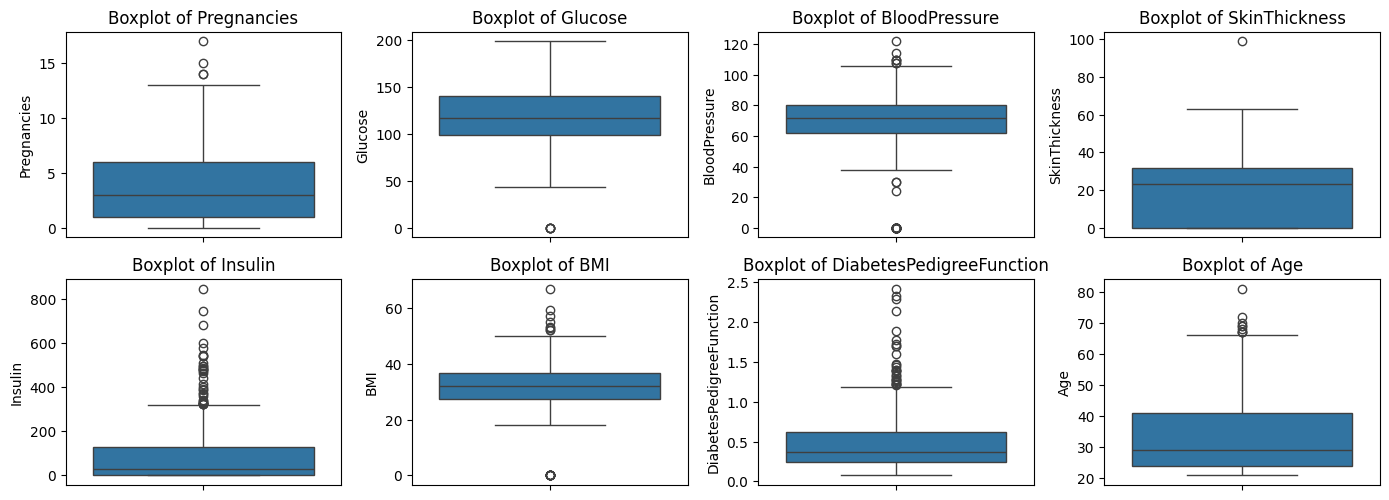

In [5]:
# Boxplots of the features
plt.figure(figsize=(14, 10))
for i, column in enumerate(dataset.columns[:-1], 1):
    plt.subplot(4, 4, i)
    sns.boxplot(dataset[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

The diabetes dataset has 768 rows and 9 columns, with 8 features and 2 Outcome classes (1 and 0, patient has diabetes or not respectively).
All features have numerical values with BMI and DiabetesPedigreeFunction being floats.
There are no apparent missing values, but there might be some deletion (eg.: due to privacy, input error), or imputation with zeros or other values. Lets investigate the columns that supposedly would be unlikely to have zero values: Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, and Age.

In [6]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Data Quality Checks & Processing (Outliers, Missing Data, Imputation, Normalisation)

Before proceeding with the check of possible zero imputation of missing values, I will address the extreme outlier in SkinThickness that would likely have a large impact distorting the modelling, this value of 99mm skin thickness converting it into a missing value and potenially impute it with a more realistic value down the pipeline.

In [7]:
# Converting extreme outlier in SkinThickness to NaN
dataset.loc[dataset['SkinThickness'] == 99, 'SkinThickness'] = np.nan
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,767.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.434159,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.708524,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Now, lets address the "zeroed" values in columns ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'] that are in my opinion missing values imputed as zero.
Then, before considering imputing them using the median or kNN I will split the dataset into train and test in a way that the test will only be composed of complete data

Count of zeros in each column: 
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

Percentage of zeros: 
Glucose           0.65
BloodPressure     4.56
SkinThickness    29.56
Insulin          48.70
BMI               1.43
dtype: float64


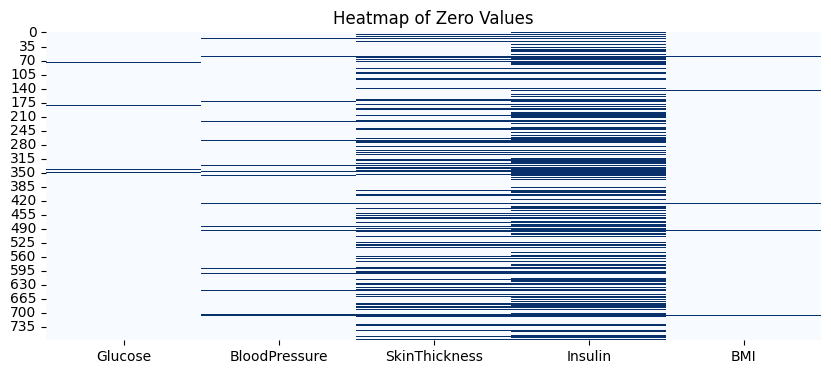

In [8]:
zero_in_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
zeros = dataset[zero_in_cols] == 0

# Count of zero values
zeros_count = zeros.sum()
print('Count of zeros in each column: ')
print(zeros_count)

# Percentage of zero values that might indicate missing data imputation
zeros_pc = ((dataset[zero_in_cols] == 0).sum() / len(dataset) * 100).round(2)
print('\nPercentage of zeros: ')
print(zeros_pc)

plt.figure(figsize=(10, 4))
sns.heatmap(zeros, cbar=False, cmap='Blues')
plt.title('Heatmap of Zero Values')
plt.show()

I believe these zero values should not have be considered zero but as not available/null values, thus I am converting them into NaN.

In [9]:
dataset[zero_in_cols] = dataset[zero_in_cols].replace(0,np.NaN)

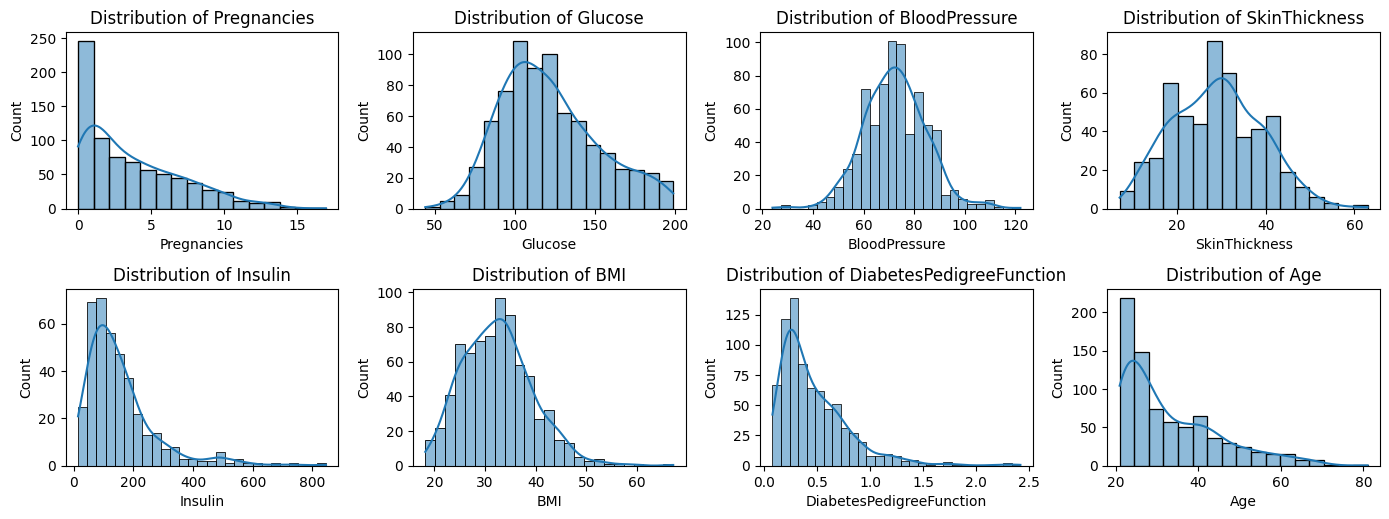

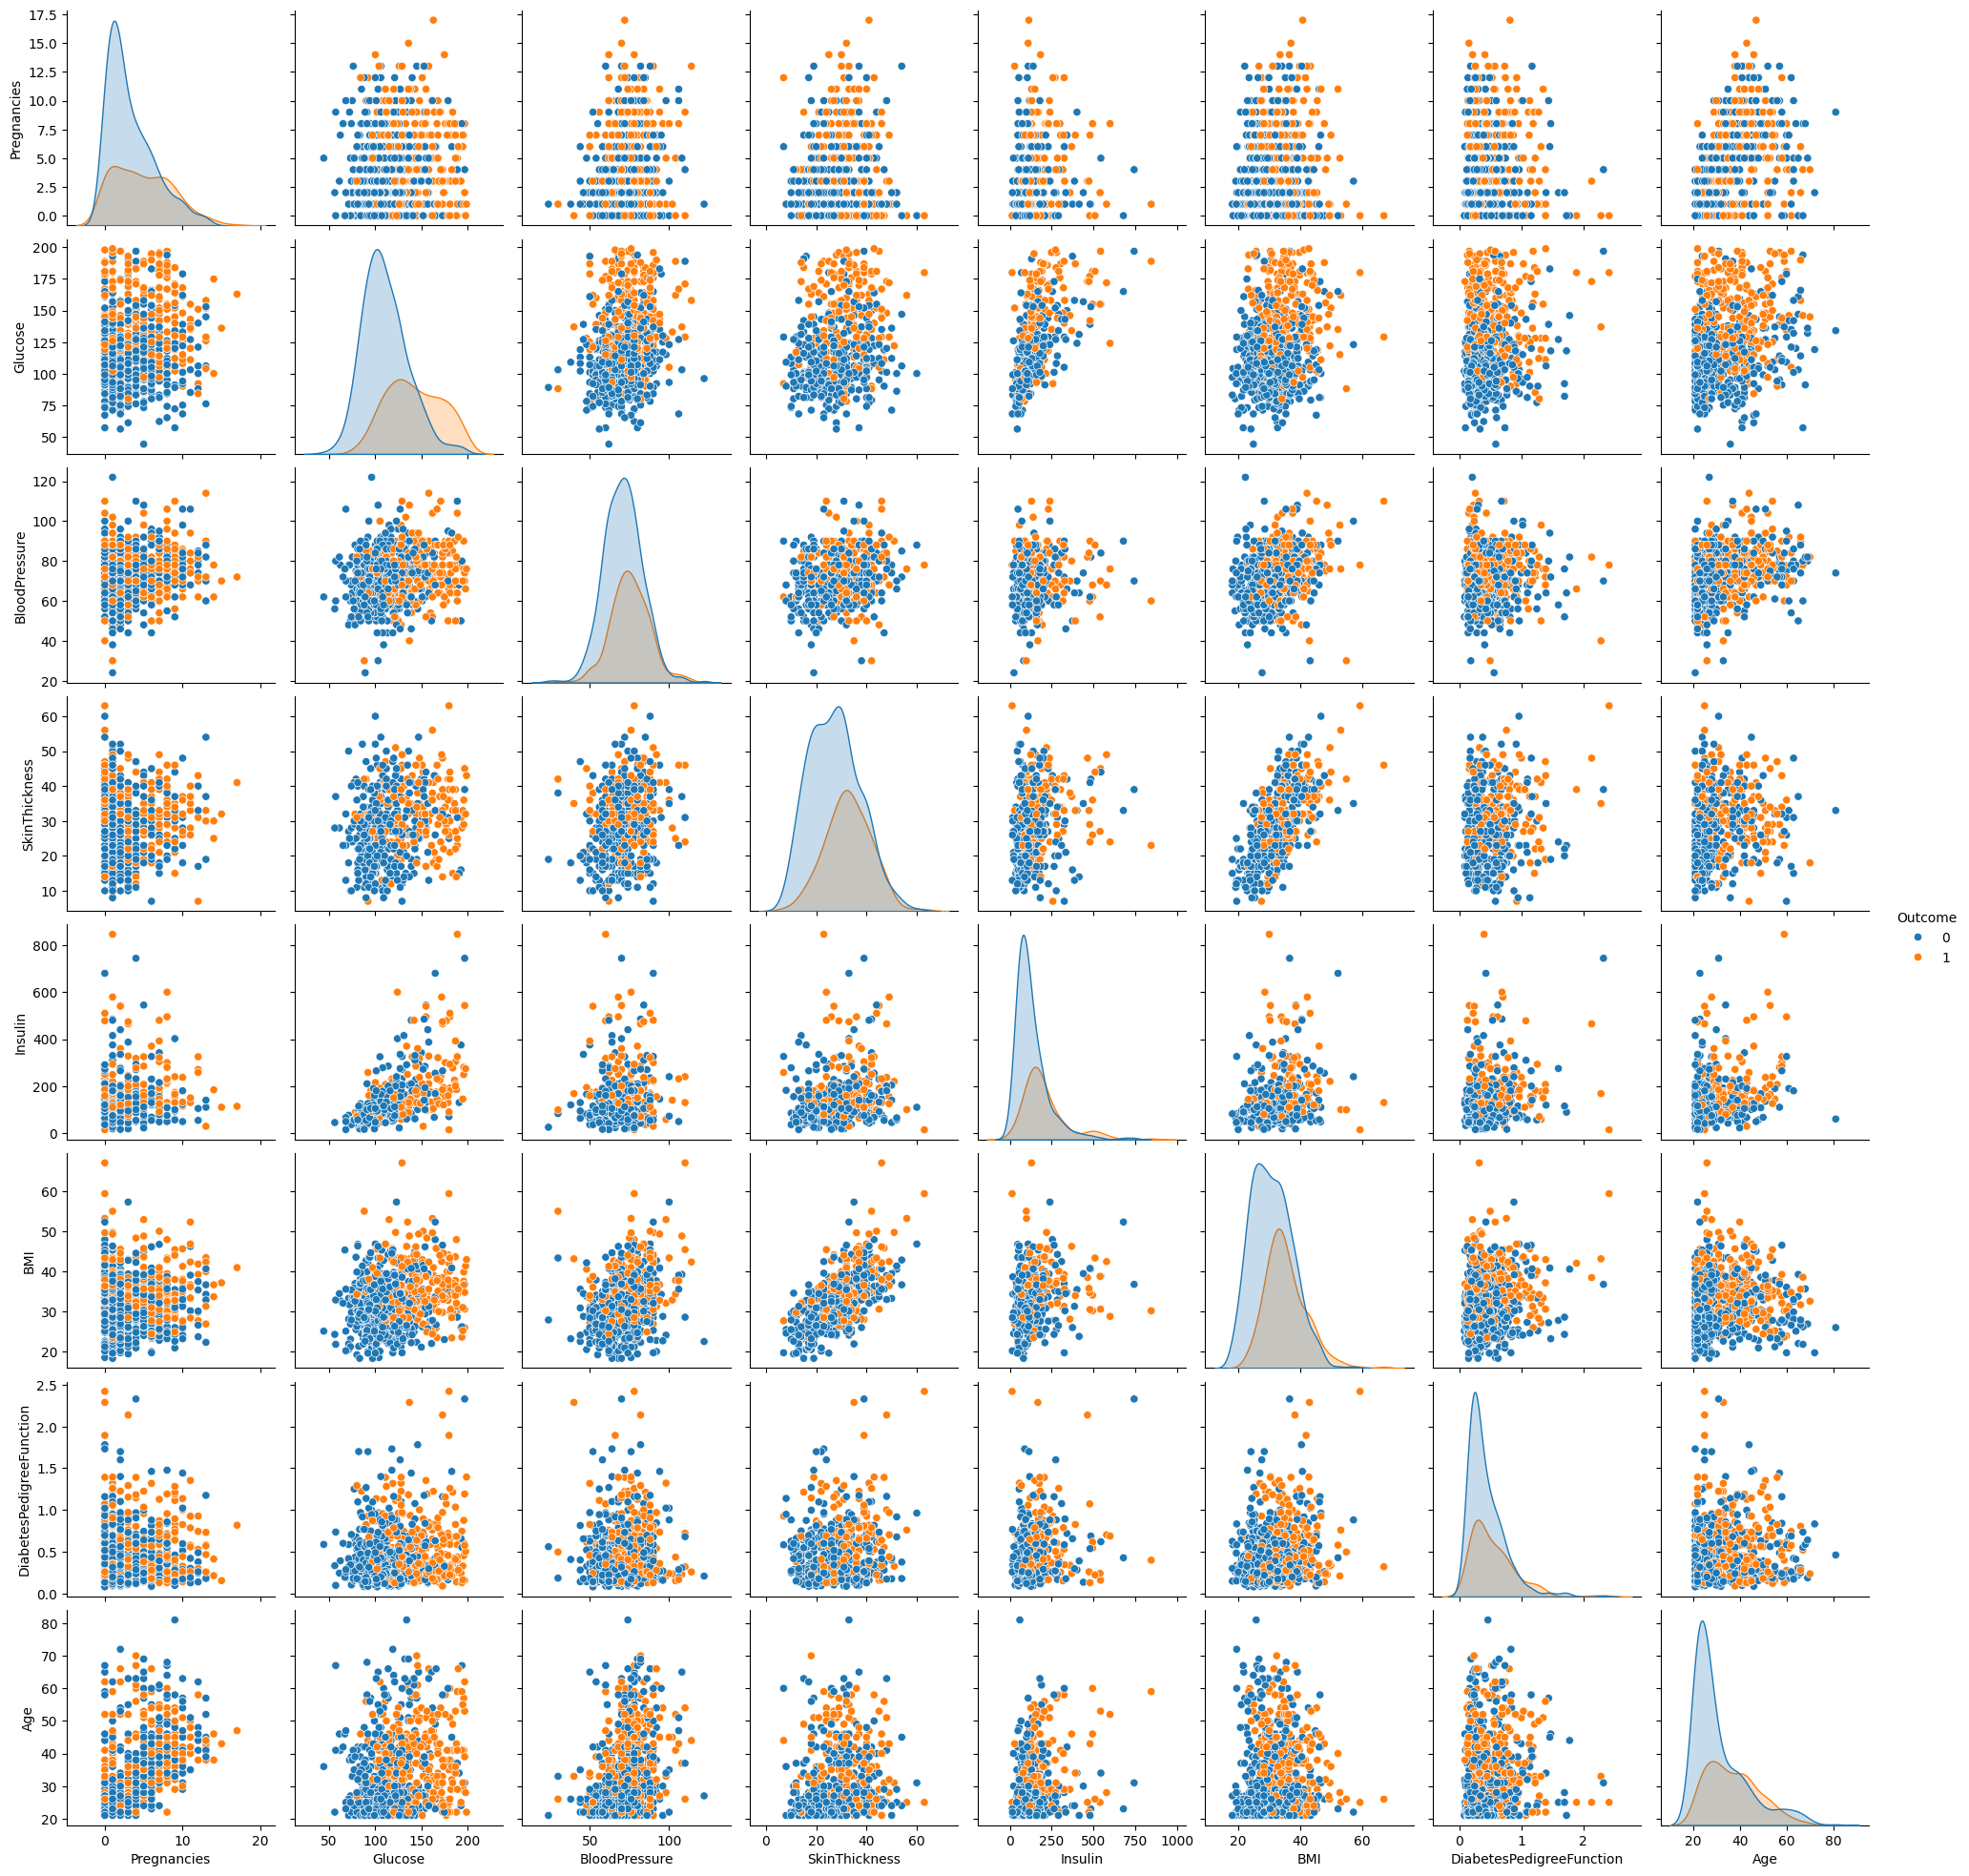

In [10]:
# Distribution plots of features
plt.figure(figsize=(14, 10))
for i, column in enumerate(dataset.columns[:-1], 1):
    plt.subplot(4, 4, i)
    sns.histplot(dataset[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Pair plot
sns.pairplot(dataset, hue='Outcome')
plt.show()


#### Dataset Train/Test Stratified Split

I initially split the dataset in Train 80% (stratified but no validation set) and Test 20%, highest accuracy was around 79% for the standardised MLP (median imputation). Then, considering the train set has a large amount of imputed data and the considerably small size of the whole dataset, I was able to improve the classification when using larger train sets (84% accuracy for the LogReg and SVM when using a 10% test set).
In conclusion, given the possibility of leading to overfitting I decided to keep the balance was to do a 80/20 split, but adding k-fold CV.

In order to avoid data leakage I opted to consider only complete cases (not imputed) for the test set.

In [11]:
# Random state
rs=42

# Separate features from target column
X = dataset.drop('Outcome', axis=1)
y = dataset['Outcome']

# Separate dataset complete cases (no NaN)
complete_cases = X.notna().all(axis=1)
X_complete = X[complete_cases]
y_complete = y[complete_cases]
X_incomplete = X[~complete_cases]
y_incomplete = y[~complete_cases]

# Ensure test set 20 % is based on the total dataset
test_size = int(0.2 * len(dataset))

# Stratified split of complete data to account for class imbalances
X_train_complete, X_test, y_train_complete, y_test = train_test_split(
    X_complete, y_complete, test_size=test_size, stratify=y_complete, random_state=rs)

# Combine the in/complete data for the train set
X_train = pd.concat([X_train_complete, X_incomplete])
y_train = pd.concat([y_train_complete, y_incomplete])

print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("\nClass distribution in whole dataset:")
print(y.value_counts(normalize=True))
print("\nClass distribution in train set:")
print(y_train.value_counts(normalize=True))
print("\nClass distribution in test set:")
print(y_test.value_counts(normalize=True))

Train set shape: (615, 8)
Test set shape: (153, 8)

Class distribution in whole dataset:
Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

Class distribution in train set:
Outcome
0    0.647154
1    0.352846
Name: proportion, dtype: float64

Class distribution in test set:
Outcome
0    0.666667
1    0.333333
Name: proportion, dtype: float64


#### Imputing Missing Values

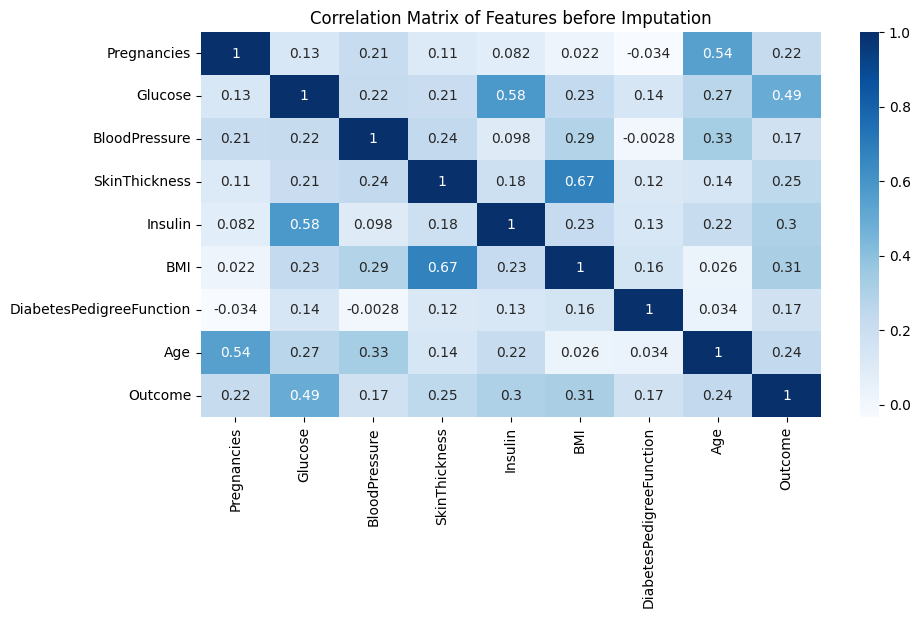

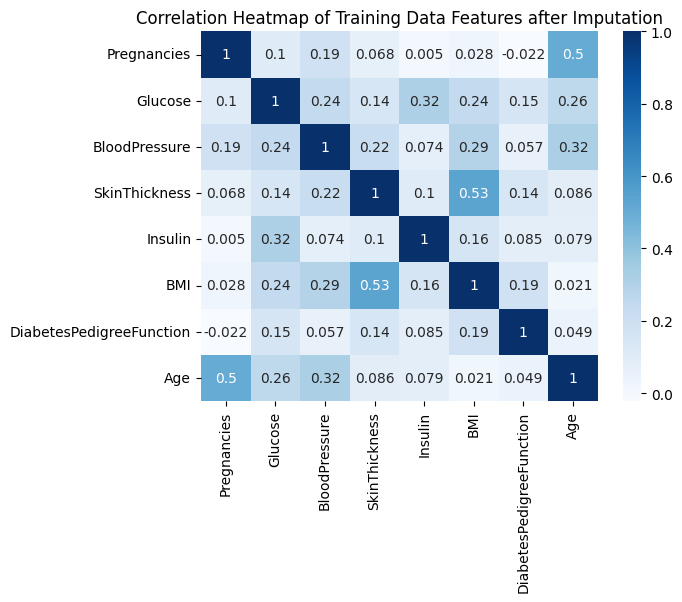

In [12]:
# Imputation on train set
imputers = {
    'Median': SimpleImputer(strategy='median'),
    'KNN': KNNImputer(n_neighbors=25)
}

imputer = imputers['Median']
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Impute missing values in the training set using the median values calculated per Outcome class
#X_train_imputed = X_train.copy()  # Create a copy to store imputed data

#for outcome_class in medians_per_class.index:
#    for col in zero_in_cols:
#        X_train_imputed.loc[(y_train == outcome_class) & (X_train[col].isna()), col] = medians_per_class.loc[outcome_class, col]

# Correlation Matrix Heatmaps
plt.figure(figsize=(10, 5))
sns.heatmap(dataset.corr(), annot=True, cmap='Blues')
plt.title('Correlation Matrix of Features before Imputation')
plt.show()

sns.heatmap(X_train_imputed.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap of Training Data Features after Imputation')
plt.show()

After testing both and multiple k values for the kNN, median still outperforms kNN even against large k-values. I also tested median imputation based on the class median values, with only LR-PCA obtaining identical results, all other models were worse than overall median imputation.

In [13]:
X_train_imputed.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7.0,142.0,90.0,24.0,480.0,30.4,0.128,43.0
1,2.0,122.0,60.0,18.0,106.0,29.8,0.717,22.0
2,0.0,91.0,68.0,32.0,210.0,39.9,0.381,25.0
3,1.0,71.0,48.0,18.0,76.0,20.4,0.323,22.0
4,0.0,100.0,88.0,60.0,110.0,46.8,0.962,31.0


In [14]:
# Apply SMOTE to train set
#smote = SMOTE(random_state=rs)
#X_train_smote, y_train_smote = smote.fit_resample(X_train_imputed, y_train)

# idea source: https://www.sciencedirect.com/science/article/pii/S2666990023000265#sec0003

I experimented using SMOTE to help with the class imbalance but results were 2~3% worse than without.

#### Normalisation

In [15]:
# Scaling data
scalers = [
    #('StandardScaler', StandardScaler()),
    ('MinMaxScaler', MinMaxScaler()),
    #('RobustScaler', RobustScaler())
]

scaled_datasets = {}
for name, scaler in scalers:
    X_train_scaled = scaler.fit_transform(X_train_imputed)
    X_test_scaled = scaler.transform(X_test)
    scaled_datasets[name] = (X_train_scaled, X_test_scaled)

After multiple tests, MinMaxScaler was generally better than StandardScaler, with RobustScaler losing to both in almost every model.

#### Defining Functions: Feature Selection, Train&Evaluate, CV, Hyperparameter Tuning

In [16]:
# Feature selection methods
#def apply_feature_selection(X_train_imputed, y_train, X_test, method='selectkbest', k=5):
#    if method == 'selectkbest':
#        selector = SelectKBest(f_classif, k=k)
#    elif method == 'selectfrommodel':
#        selector = SelectFromModel(estimator=RandomForestClassifier(n_estimators=20), max_features=k)
#    else:
#        raise ValueError("Feature selection error!")
#
#    X_train_selected = selector.fit_transform(X_train_imputed, y_train)
#    X_test_selected = selector.transform(X_test)

    # Get the column names from the original DataFrame (before scaling/imputing)
#    selected_features = X_train.columns[selector.get_support()].tolist()
#    print(f"Selected features ({method}): {selected_features}")

#    return X_train_selected, X_test_selected, selected_features

# Function to train and evaluate classifiers
def train_and_evaluate(clf, X_train, X_test, y_train, y_test, name):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Cross-validation
def perform_cross_validation(model, X, y, cv=10):
    cv_scores = cross_val_score(model, X, y, cv=cv)
    print(f"Mean CV score: {cv_scores.mean()}")

# Hyperparameter Tuning
def perform_hyperparameter_tuning(model, param_grid, X, y, cv=10, method='grid', n_iter=20): # n_iter=30, cv=5
    if method == 'grid':
        search = GridSearchCV(model, param_grid, cv=cv)
    elif method == 'random':
        search = RandomizedSearchCV(model, param_grid, n_iter=n_iter, cv=cv, scoring='accuracy', random_state=rs) #scoring='f1'
    else:
        raise ValueError("Invalid method. Choose 'grid' or 'random'.")

    search.fit(X, y)
    print(f"Best parameters: {search.best_params_}")
    print(f"Best cross-validation score: {search.best_score_}")
    return search.best_estimator_


### Baseline Classifiers (w/ total time comparison)


Logistic Regression (MinMaxScaler) Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       102
           1       0.67      0.65      0.66        51

    accuracy                           0.78       153
   macro avg       0.75      0.75      0.75       153
weighted avg       0.78      0.78      0.78       153



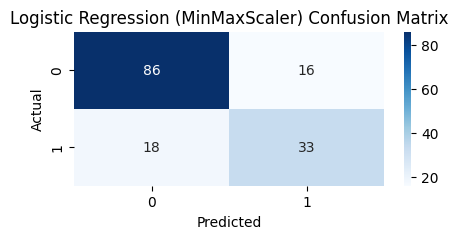

Time taken for "Logistic Regression (MinMaxScaler)": 0.38 seconds


SVM (MinMaxScaler) Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       102
           1       0.63      0.61      0.62        51

    accuracy                           0.75       153
   macro avg       0.72      0.72      0.72       153
weighted avg       0.75      0.75      0.75       153



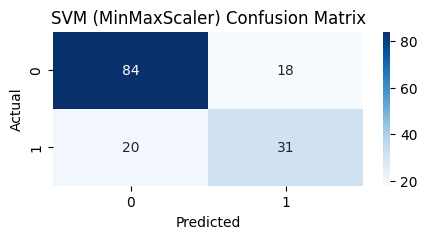

Time taken for "SVM (MinMaxScaler)": 0.19 seconds


MLP (MinMaxScaler) Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       102
           1       0.62      0.75      0.68        51

    accuracy                           0.76       153
   macro avg       0.74      0.76      0.75       153
weighted avg       0.78      0.76      0.77       153



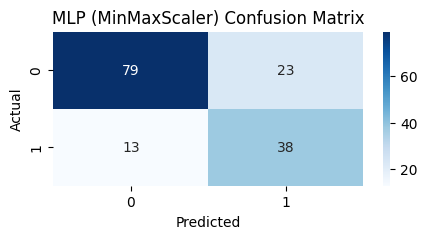

Time taken for "MLP (MinMaxScaler)": 0.57 seconds



In [17]:
# Initialise classifiers
lr = LogisticRegression(random_state=rs)
svm = SVC(random_state=rs)
mlp = MLPClassifier(random_state=rs)

classifiers = [
    ('Logistic Regression', lr),
    ('SVM', svm),
    ('MLP', mlp)
]

# Baseline evaluation of classifiers before tuning
for name, clf in classifiers:
    for scaler_name, (X_train_scaled, X_test_scaled) in scaled_datasets.items():
        start_time = time.time()  # start timer
        full_name = f"{name} ({scaler_name})"
        train_and_evaluate(clf, X_train_scaled, X_test_scaled, y_train, y_test, full_name)
        end_time = time.time()  # end timer
        total_time = end_time - start_time  # Calculate total time

        print(f'Time taken for "{full_name}": {total_time:.2f} seconds\n')

### MLP (Solver & Alpha Comparison)


 MLP with solver=adam & alpha=0.001:
Best parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh'}
Best cross-validation score: 0.7675304071919619

Best MLP (MinMaxScaler_solver=adam_alpha=0.001) Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       102
           1       0.64      0.69      0.66        51

    accuracy                           0.76       153
   macro avg       0.74      0.75      0.74       153
weighted avg       0.77      0.76      0.77       153



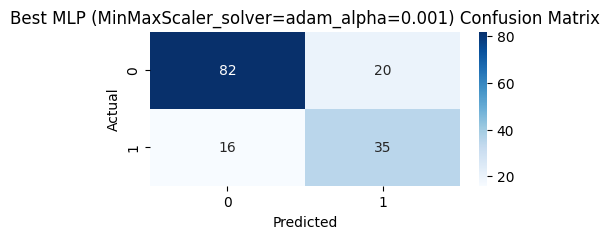


 MLP with solver=adam & alpha=1:
Best parameters: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh'}
Best cross-validation score: 0.769169751454257

Best MLP (MinMaxScaler_solver=adam_alpha=1) Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       102
           1       0.74      0.63      0.68        51

    accuracy                           0.80       153
   macro avg       0.79      0.76      0.77       153
weighted avg       0.80      0.80      0.80       153



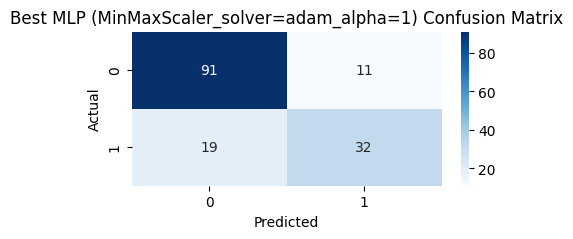


 MLP with solver=lbfgs & alpha=0.001:
Best parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu'}
Best cross-validation score: 0.7529085140137494

Best MLP (MinMaxScaler_solver=lbfgs_alpha=0.001) Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       102
           1       0.62      0.69      0.65        51

    accuracy                           0.76       153
   macro avg       0.73      0.74      0.73       153
weighted avg       0.77      0.76      0.76       153



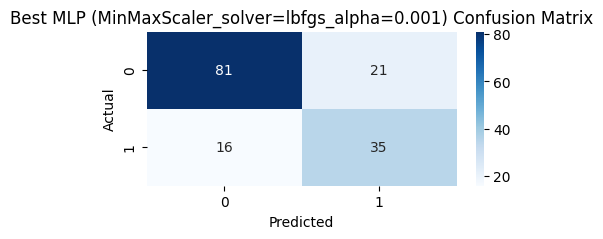


 MLP with solver=lbfgs & alpha=1:
Best parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh'}
Best cross-validation score: 0.7739291380222104

Best MLP (MinMaxScaler_solver=lbfgs_alpha=1) Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       102
           1       0.64      0.76      0.70        51

    accuracy                           0.78       153
   macro avg       0.75      0.77      0.76       153
weighted avg       0.79      0.78      0.78       153



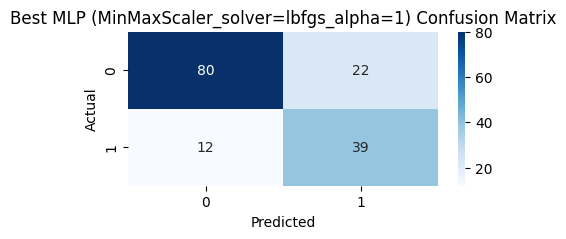

In [18]:
# MLP Hyperparameter Comparison
param_grid_mlp = {
    'hidden_layer_sizes': [(50, 50), (100, 50)],
    'activation': ['tanh', 'relu'],
}
solvers = ['adam', 'lbfgs']
alphas = [0.001, 1]

mlp_models = {}

# Loop through each solver and alpha value
for solver in solvers:
    for alpha in alphas:
        print(f"\n MLP with solver={solver} & alpha={alpha}:")

        # Update the model with the current solver and alpha
        mlp = MLPClassifier(random_state=rs, solver=solver, alpha=alpha)

        for scaler_name, (X_train_scaled, X_test_scaled) in scaled_datasets.items():
            best_mlp = perform_hyperparameter_tuning(mlp, param_grid_mlp, X_train_scaled, y_train, method='random', n_iter=20)
            model_name = f"{scaler_name}_solver={solver}_alpha={alpha}"
            mlp_models[model_name] = best_mlp

            # Train and evaluate the model
            train_and_evaluate(best_mlp, X_train_scaled, X_test_scaled, y_train, y_test, f'Best MLP ({model_name})')


#### Optimising Alpha


Best model before alpha optimisation: MinMaxScaler_solver=adam_alpha=1
Optimising alpha for the best MLP model...
Best parameters: {'alpha': 1.3231578947368423}
Best cross-validation score: 0.7708090957165521

Classification Report for Best MLP Model with Optimised Alpha:
              precision    recall  f1-score   support

           0       0.82      0.91      0.87       102
           1       0.78      0.61      0.68        51

    accuracy                           0.81       153
   macro avg       0.80      0.76      0.77       153
weighted avg       0.81      0.81      0.80       153



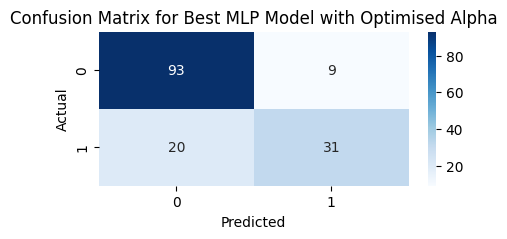


Summary of Best Model with Optimised Alpha:
Best model: {'activation': 'tanh', 'alpha': 1.3231578947368423, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


In [19]:
# Optimise alpha for the best model
param_grid_alpha = {
    'alpha': np.linspace(0.01, 5, 20)
}

# Get best model from the previous comparisons
best_model_name = max(mlp_models, key=lambda name: mlp_models[name].score(X_test_scaled, y_test))
best_model = mlp_models[best_model_name]

print(f"\nBest model before alpha optimisation: {best_model_name}")

# Optimise alpha for the best model
print("Optimising alpha for the best MLP model...")
initial_params = best_model.get_params()

# MLP model with the best parameters for tuning alpha
mlp_no_alpha = MLPClassifier(
    random_state=rs,
    solver=initial_params['solver'],
    hidden_layer_sizes=initial_params['hidden_layer_sizes'],
    activation=initial_params['activation']
)

# Perform hyperparameter tuning for alpha
best_alpha_mlp = perform_hyperparameter_tuning(mlp_no_alpha, param_grid_alpha, X_train_scaled, y_train, method='grid', n_iter=30)

# Evaluate best alpha model with classification report and confusion matrix
y_pred = best_alpha_mlp.predict(X_test_scaled)
print("\nClassification Report for Best MLP Model with Optimised Alpha:")
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(5, 2))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Best MLP Model with Optimised Alpha')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Output best parameters and cross-validation score
print("\nSummary of Best Model with Optimised Alpha:")
print(f"Best model: {best_alpha_mlp.get_params()}")

### Tuned Best MLP


Best MLP Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       102
           1       0.78      0.63      0.70        51

    accuracy                           0.82       153
   macro avg       0.81      0.77      0.78       153
weighted avg       0.81      0.82      0.81       153



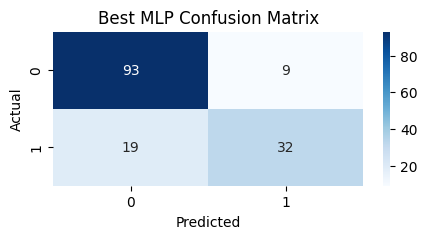

In [20]:
# MLP Classifier model
mlp_best = MLPClassifier(random_state=rs)

# Tuned Parameters for the MLP model
mlp_best_param = {
    'mlp__hidden_layer_sizes': [(100, 50)],
    'mlp__activation': ['tanh'],
    'mlp__solver': ['adam'],
    'mlp__alpha': [1.3231578947368423],
}

# Prepare a list to store results
results = []

# Loop through each scaler and create a pipeline for each
for scaler_name, scaler in scalers:
    pipe = Pipeline([
        ('scaler', scaler),
        ('feature_selection', SelectFromModel(RandomForestClassifier(random_state=rs), max_features=5)),
        ('mlp', mlp_best)
    ])

    # GridSearchCV setup for MLP with above parameters
    grid_search = GridSearchCV(
        estimator=pipe,
        param_grid=mlp_best_param,
        cv=10,
    )

    grid_search.fit(X_train_imputed, y_train)

    best_mlp = grid_search.best_estimator_

    train_and_evaluate(best_mlp, X_train_imputed, X_test, y_train, y_test, f'Best MLP')



### SVM (kernel accuracy comparison)

In [21]:
# SVM kernel accuracy comparison
kernels = ['linear', 'rbf', 'sigmoid']

for i in kernels:
    model = SVC(kernel=i)
    model.fit(X_train_scaled, y_train)
    prediction = model.predict(X_test_scaled)
    print('Accuracy for SVM', i, 'kernel:', accuracy_score(y_test, prediction))

Accuracy for SVM linear kernel: 0.7647058823529411
Accuracy for SVM rbf kernel: 0.7516339869281046
Accuracy for SVM sigmoid kernel: 0.38562091503267976


#### SVM Tuning


Selected features for MinMaxScaler: ['Glucose', 'BMI', 'DiabetesPedigreeFunction']

Classification Report for Best SVM Model with MinMaxScaler:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       102
           1       0.71      0.69      0.70        51

    accuracy                           0.80       153
   macro avg       0.78      0.77      0.78       153
weighted avg       0.80      0.80      0.80       153



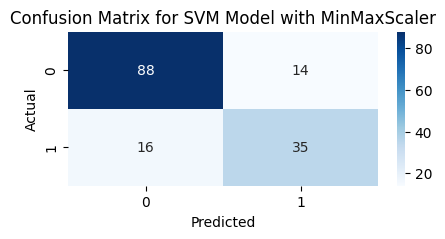

Best parameters for SVM using MinMaxScaler: {'kernel': 'linear', 'C': 1}


In [22]:
# SVM Hyperparameter Tuning
param_distributions_svm = {
    'C': [0.1, 1, 3],
    'kernel': ['linear', 'rbf'],
}
best_svm_models = {}

# Loop through the scaled datasets
for scaler_name, (X_train_scaled, X_test_scaled) in scaled_datasets.items():

    # Apply SelectFromModel for feature selection
    selector_sfm = SelectFromModel(RandomForestClassifier(random_state=rs, n_estimators=20), max_features=5)
    X_train_sfm = selector_sfm.fit_transform(X_train_scaled, y_train)
    X_test_sfm = selector_sfm.transform(X_test_scaled)

    # Print the selected feature names
    selected_features = selector_sfm.get_support(indices=True)
    selected_feature_names = X_train_imputed.columns[selected_features]
    print(f"\nSelected features for {scaler_name}: {selected_feature_names.tolist()}")

    # Initialise the SVM model
    svm = SVC(random_state=rs)

    # RandomizedSearchCV setup for SVM with specified parameters
    random_search_svm = RandomizedSearchCV(
        estimator=svm,
        param_distributions=param_distributions_svm,
        n_iter=30,
        cv=10,
        #scoring='f1',
    )

    # Fit the model
    random_search_svm.fit(X_train_sfm, y_train)

    # Get the best model
    best_svm = random_search_svm.best_estimator_
    best_svm_models[scaler_name] = best_svm

    # Evaluate the best SVM model
    y_pred = best_svm.predict(X_test_sfm)
    print(f"\nClassification Report for Best SVM Model with {scaler_name}:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    plt.figure(figsize=(5, 2))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for SVM Model with {scaler_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    print(f"Best parameters for SVM using {scaler_name}: {random_search_svm.best_params_}")

#### Best SVM using features ('Glucose', 'BMI', 'Age')


Using only features: ['Glucose', 'BMI', 'Age'] for MinMaxScaler

Classification Report for Best SVM Model with MinMaxScaler:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       102
           1       0.73      0.73      0.73        51

    accuracy                           0.82       153
   macro avg       0.79      0.79      0.79       153
weighted avg       0.82      0.82      0.82       153



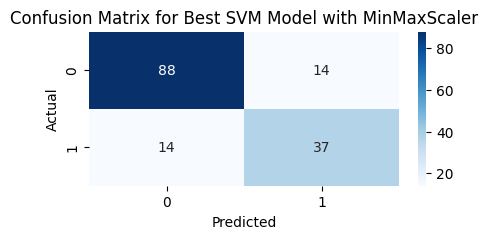

In [23]:
# Best features for SVM
best_features = ['Glucose', 'BMI', 'Age']
feat_indices = [X_train_imputed.columns.get_loc(feature) for feature in best_features]

# Best SVM Parameters
param_distributions_svm = {
    'C': [1],
    'kernel': ['rbf'],
}

# Loop through the scaled datasets
for scaler_name, (X_train_scaled, X_test_scaled) in scaled_datasets.items():

    X_train_selected = X_train_scaled[:, feat_indices]
    X_test_selected = X_test_scaled[:, feat_indices]

    print(f"\nUsing only features: {best_features} for {scaler_name}")

    svm = SVC(random_state=rs)
    svm.fit(X_train_selected, y_train)

    # Evaluate the best SVM model
    y_pred = svm.predict(X_test_selected)
    print(f"\nClassification Report for Best SVM Model with {scaler_name}:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    plt.figure(figsize=(5, 2))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for Best SVM Model with {scaler_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### Logistic Regression and Log.Reg with Dimensionality Reduction: PCA and FLD/LDA


Baseline Logistic Regression (MinMaxScaler)
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       102
           1       0.67      0.65      0.66        51

    accuracy                           0.78       153
   macro avg       0.75      0.75      0.75       153
weighted avg       0.78      0.78      0.78       153



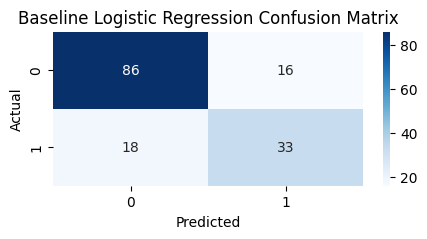


Baseline Logistic Regression-PCA (MinMaxScaler)
              precision    recall  f1-score   support

           0       0.81      0.90      0.86       102
           1       0.75      0.59      0.66        51

    accuracy                           0.80       153
   macro avg       0.78      0.75      0.76       153
weighted avg       0.79      0.80      0.79       153



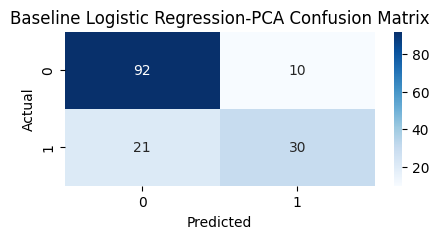


Baseline Logistic Regression-FLD/LDA (MinMaxScaler)
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       102
           1       0.65      0.67      0.66        51

    accuracy                           0.77       153
   macro avg       0.74      0.75      0.74       153
weighted avg       0.77      0.77      0.77       153



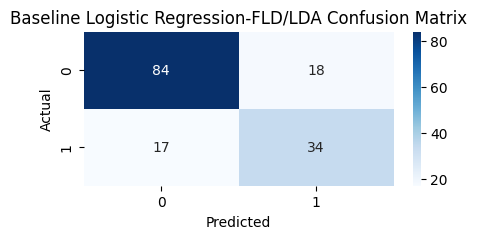

In [24]:
# Baseline LR, LR-PCA, LR-LDA using Pipelines
for scaler_name, (X_train_scaled, X_test_scaled) in scaled_datasets.items():
    models = {
        'Baseline Logistic Regression': Pipeline([('logistic', LogisticRegression(random_state=rs))]),
        'Baseline Logistic Regression-PCA': Pipeline([('pca', PCA(n_components=2)), ('logistic', LogisticRegression(random_state=rs))]),
        'Baseline Logistic Regression-FLD/LDA': Pipeline([('lda', LDA(n_components=1)), ('logistic', LogisticRegression(random_state=rs))])
    }

    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        print(f"\n{name} ({scaler_name})")
        print(classification_report(y_test, y_pred))
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(5, 2))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'{name} Confusion Matrix')
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.show()

#### Feature Selection for Logistic Regression, LR-PCA, and LR-LDA


Logistic Regression with SelectFromModel (MinMaxScaler)
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       102
           1       0.78      0.63      0.70        51

    accuracy                           0.82       153
   macro avg       0.81      0.77      0.78       153
weighted avg       0.81      0.82      0.81       153



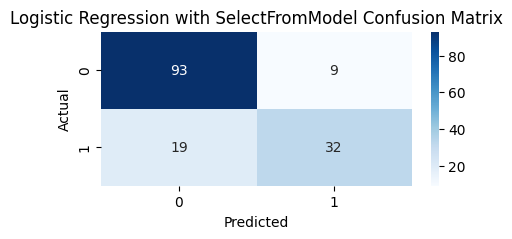


Logistic Regression with SelectKBest (MinMaxScaler)
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       102
           1       0.66      0.65      0.65        51

    accuracy                           0.77       153
   macro avg       0.74      0.74      0.74       153
weighted avg       0.77      0.77      0.77       153



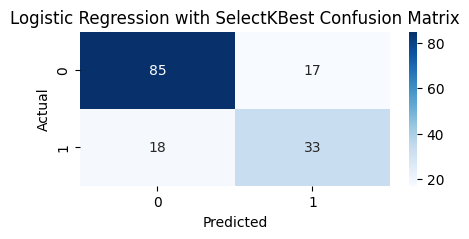


Logistic Regression-PCA with SelectFromModel (MinMaxScaler)
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       102
           1       0.69      0.65      0.67        51

    accuracy                           0.78       153
   macro avg       0.76      0.75      0.75       153
weighted avg       0.78      0.78      0.78       153



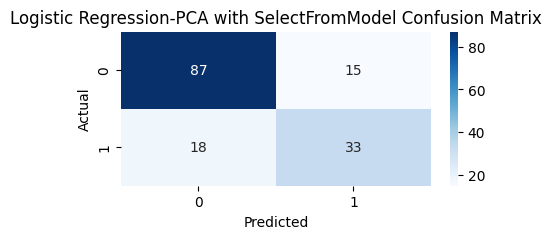


Logistic Regression-PCA with SelectKBest (MinMaxScaler)
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       102
           1       0.72      0.67      0.69        51

    accuracy                           0.80       153
   macro avg       0.78      0.77      0.77       153
weighted avg       0.80      0.80      0.80       153



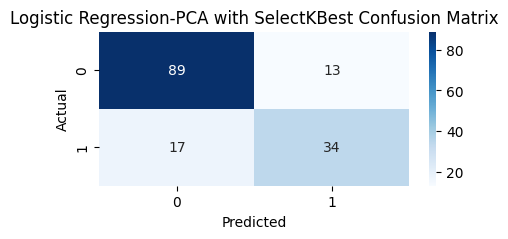


Logistic Regression-LDA with SelectFromModel (MinMaxScaler)
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       102
           1       0.73      0.65      0.69        51

    accuracy                           0.80       153
   macro avg       0.78      0.76      0.77       153
weighted avg       0.80      0.80      0.80       153



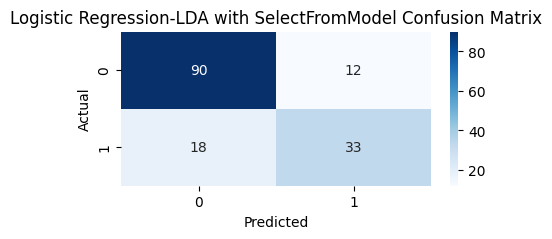


Logistic Regression-LDA with SelectKBest (MinMaxScaler)
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       102
           1       0.66      0.65      0.65        51

    accuracy                           0.77       153
   macro avg       0.74      0.74      0.74       153
weighted avg       0.77      0.77      0.77       153



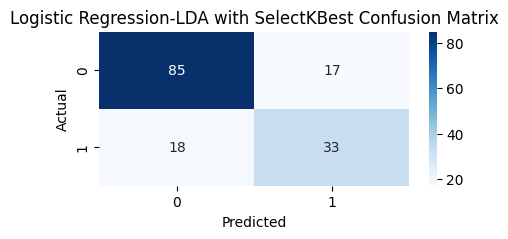

In [25]:
# StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=rs)

# Feature Selection and Tuning using GridSearchCV
for scaler_name, (X_train_scaled, X_test_scaled) in scaled_datasets.items():
    # Predefined pipelines for baseline models
    pipelines = {
        'Logistic Regression': Pipeline([('logistic', LogisticRegression(random_state=rs))]),
        'Logistic Regression-PCA': Pipeline([('pca', PCA(n_components=2)), ('logistic', LogisticRegression(random_state=rs))]),
        'Logistic Regression-LDA': Pipeline([('lda', LDA(n_components=1)), ('logistic', LogisticRegression(random_state=rs))])
    }

    for fs_name, base_pipe in pipelines.items():
        num_features = X_train_scaled.shape[1]
        max_features = min(5, num_features)

        # Define feature selection methods
        feature_selection_methods = {
            'SelectFromModel': SelectFromModel(RandomForestClassifier(random_state=rs), max_features=max_features),
            'SelectKBest': SelectKBest(score_func=f_classif, k=max_features)
        }

        for method_name, selector in feature_selection_methods.items():
            # Create a new pipeline by adding the feature selector to the existing pipeline
            full_pipeline = Pipeline([
                ('feature_selection', selector),
                ('model', base_pipe)
            ])

            # Define the hyperparameter grid for logistic regression
            param_grid = {
                'model__logistic__C': np.logspace(-5, 5, 10)
            }

            # Grid search
            grid_search = GridSearchCV(full_pipeline, param_grid, cv=cv)
            grid_search.fit(X_train_scaled, y_train)

            # Evaluate the best model found by GridSearchCV
            best_model = grid_search.best_estimator_
            y_pred = best_model.predict(X_test_scaled)

            print(f'\n{fs_name} with {method_name} ({scaler_name})')
            print(classification_report(y_test, y_pred))
            cm = confusion_matrix(y_test, y_pred)
            plt.figure(figsize=(5, 2))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
            plt.title(f'{fs_name} with {method_name} Confusion Matrix')
            plt.ylabel('Actual')
            plt.xlabel('Predicted')
            plt.show()
